# Recommendation System

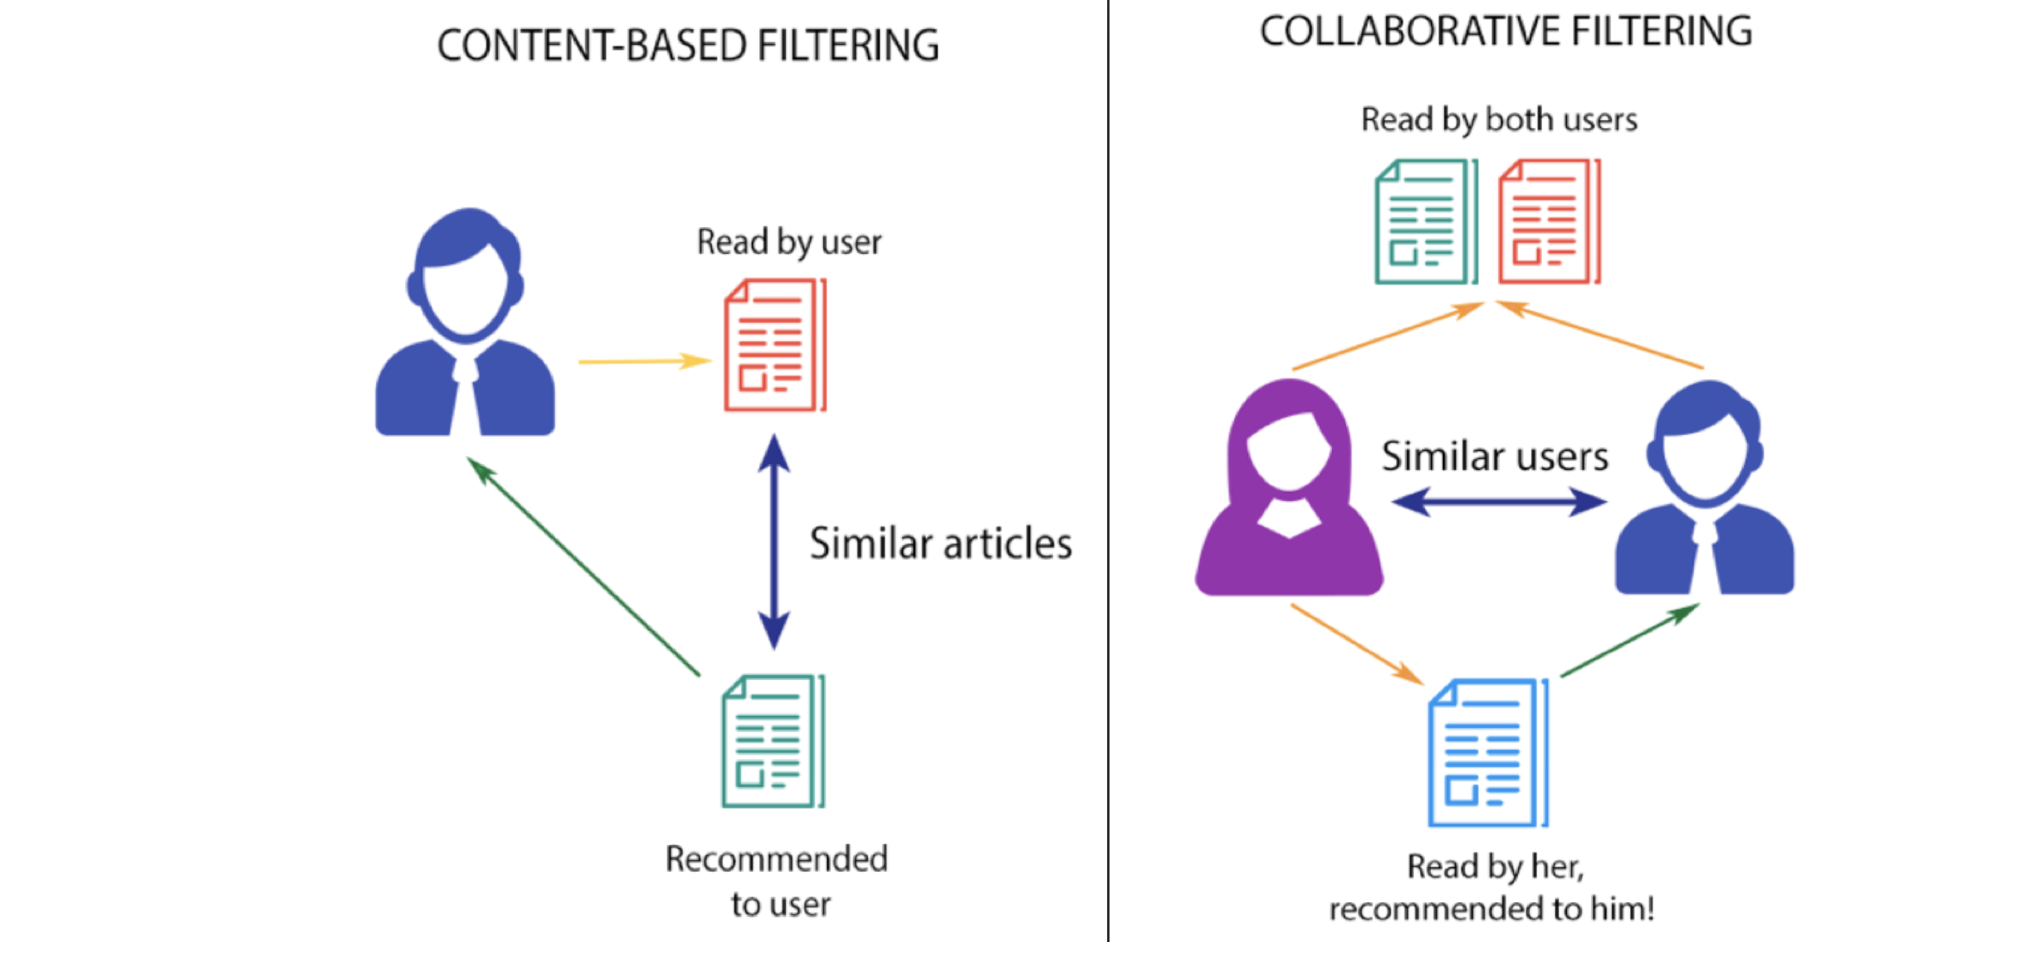

A recommendation system is a system that seeks to predict or filter preferences according to the user's choices. The created Web-App using Python is a similar system, which suggests courses based on the user's liked or searched courses.

# System Overview

- In this course recommendation system, content-based similarity filtering based on the course tags which the users either watch or search is being used. 

- The dataset used is of the [Coursera Courses Dataset](https://www.kaggle.com/khusheekapoor/coursera-courses-dataset-2021) which contains over 3,000 courses!

Another approach can be collabrative filtering, which is not used in this notebook. An advance approach can be using both these approach in a hybrid mode.,

# Importing Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Dependencies Imported')

Dependencies Imported


In [3]:
data = pd.read_csv("Coursera.csv")
data.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


# Basic Data Analysis

In [4]:
data.shape #3522 courses and 7 columns with different attributes

(3522, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [6]:
data.isnull().sum() #no value is missing

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [7]:
data['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [7]:
data['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [8]:
data['University'].value_counts()

Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: University, Length: 184, dtype: int64

In [9]:
data['Course Name']

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3517    Capstone: Retrieving, Processing, and Visualiz...
3518                     Patrick Henry: Forgotten Founder
3519    Business intelligence and data analytics: Gene...
3520                                  Rigid Body Dynamics
3521    Architecting with Google Kubernetes Engine: Pr...
Name: Course Name, Length: 3522, dtype: object

# Required Columns for System

#### Important columns to be used in recommendation system : 

- Course Name : Names of the courses
- Course Description : Similar courses may have similar course description
- Skills : Users may want to see courses based on same skills
- Difficulty Level : Similar courses as per difficulty level 

#### Columns not used for the recommendation system :

- Course Ratings : Numerical Column; Ratings can sometimes become a biased factor and distribution is not even
- University : Same university might offer multiple courses in different domains which the user might not want to see
- Course URL : No significance in the recommendation system

In [15]:
data = data[['Course Name','Difficulty Level','Course Description','Skills']]

In [16]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


# Data Pre-Processing

An important part of the process is to pre-process the data into usable format for the recommendation system

In [17]:
# Removing spaces between the words (Lambda funtions can be used as well)

data['Course Name'] = data['Course Name'].str.replace(' ',',')
data['Course Name'] = data['Course Name'].str.replace(',,',',')
data['Course Name'] = data['Course Name'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace(' ',',')
data['Course Description'] = data['Course Description'].str.replace(',,',',')
data['Course Description'] = data['Course Description'].str.replace('_','')
data['Course Description'] = data['Course Description'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace('(','')
data['Course Description'] = data['Course Description'].str.replace(')','')

#removing paranthesis from skills columns 
data['Skills'] = data['Skills'].str.replace('(','')
data['Skills'] = data['Skills'].str.replace(')','')

C:\Users\risha\AppData\Local\Temp\ipykernel_13936\3736442051.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Course Description'] = data['Course Description'].str.replace('(','')
C:\Users\risha\AppData\Local\Temp\ipykernel_13936\3736442051.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Course Description'] = data['Course Description'].str.replace(')','')
C:\Users\risha\AppData\Local\Temp\ipykernel_13936\3736442051.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Skills'] = data['Skills'].

In [18]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...


# Tags Column

The tags column is the combination of the following columns : **Course Name** + **Difficulty Level** + **Course Description** + **Skills**

In [19]:
data['tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']

In [20]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...,"Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...,"Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...,"Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...,"Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...,"Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [21]:
data['tags'].iloc[1]

'Business,Strategy,Business,Model,Canvas,Analysis,with,MiroBeginnerBy,the,end,of,this,guided,project,you,will,be,fluent,in,identifying,and,creating,Business,Model,Canvas,solutions,based,on,previous,high-level,analyses,and,research,data.,This,will,enable,you,to,identify,and,map,the,elements,required,for,new,products,and,services.,Furthermore,it,is,essential,for,generating,positive,results,for,your,business,venture.,This,guided,project,is,designed,to,engage,and,harness,your,visionary,and,exploratory,abilities.,You,will,use,proven,models,in,strategy,and,product,development,with,the,Miro,platform,to,explore,and,analyse,your,business,propositions.,,We,will,practice,critically,examining,results,from,previous,analysis,and,research,results,in,deriving,the,values,for,each,of,the,business,model,sections.Finance  business plan  persona user experience  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

# Dataframe to be used

In [22]:
new_df = data[['Course Name','tags']]

In [23]:
new_df.head(5)

,Course Name,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers","Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [24]:
new_df['tags'] = data['tags'].str.replace(',',' ')

C:\Users\risha\AppData\Local\Temp\ipykernel_13936\3366302733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = data['tags'].str.replace(',',' ')


In [25]:
new_df['Course Name'] = data['Course Name'].str.replace(',',' ')

C:\Users\risha\AppData\Local\Temp\ipykernel_13936\1395081966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = data['Course Name'].str.replace(',',' ')


In [26]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

C:\Users\risha\AppData\Local\Temp\ipykernel_13936\2809988695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)


In [22]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()) #lower casing the tags column

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
new_df.head(5)

,course_name,tags
0,Write A Feature Length Screenplay For Film Or ...,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy Business Model Canvas Analys...,Business Strategy Business Model Canvas Analys...
2,Silicon Thin Film Solar Cells,Silicon Thin Film Solar CellsAdvancedThis cour...
3,Finance for Managers,Finance for ManagersIntermediateWhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,Retrieve Data using Single-Table SQL QueriesBe...


In [28]:
new_df.shape #3522 courses with tags and 2 columns (course_name and tags)

(3522, 2)

# Text Vectorization

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [31]:
vectors = cv.fit_transform(new_df['tags']).toarray()

# Stemming Process

In [32]:
import nltk #for stemming process

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
#defining the stemming function
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [35]:
new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column

C:\Users\risha\AppData\Local\Temp\ipykernel_13936\3741851974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column


# Similarity Measure 

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity = cosine_similarity(vectors)

# Recommendation Function

In [40]:
def recommend(course):
    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]
    
    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

In [42]:
recommend('Business Strategy Business Model Canvas Analysis with Miro') 

Product Development Customer Persona Development with Miro
Product and Service Development Empathy Mapping with Miro
Product Development Customer Journey Mapping with Miro
Analyzing Macro-Environmental Factors Using Creately
Business Strategy in Practice (Project-centered Course)
Innovating with the Business Model Canvas


**So these are the 6 courses which are recommended based on our search in the recommendation function**

# Exporting the Model

In [36]:
import pickle

In [37]:
# pickle.dump(similarity,open('similarity.pkl','wb'))
# pickle.dump(new_df.to_dict(),open('course_list.pkl','wb')) #contains the dataframe in dict 
# pickle.dump(new_df,open('courses.pkl','wb'))